In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
gas_data = pd.read_csv("/content/gas_turbines.csv")
gas_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
gas_data["yield"]= gas_data['TEY']
gas_data = gas_data.drop('TEY', axis=1)
gas_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,yield
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72


In [ ]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  yield   15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


no missing values observerd

In [ ]:
gas_data[gas_data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,yield


no dupicated data in given dataset

AT


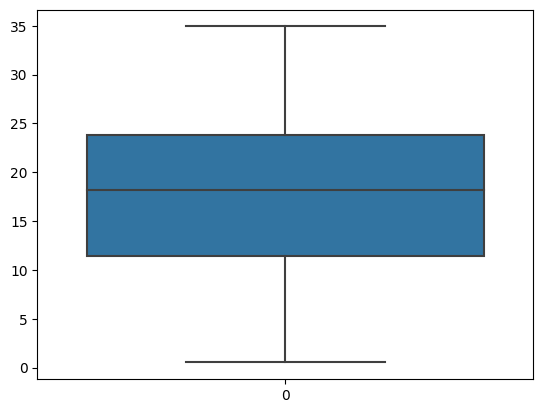

AP


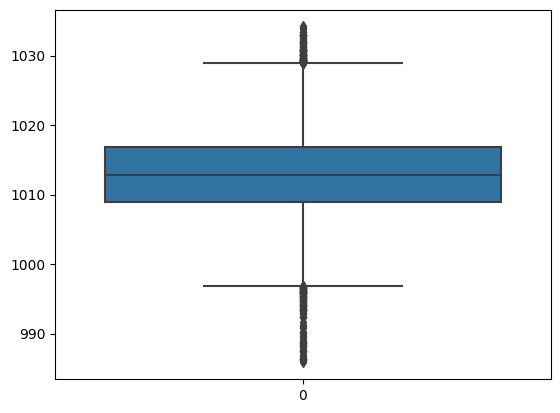

AH


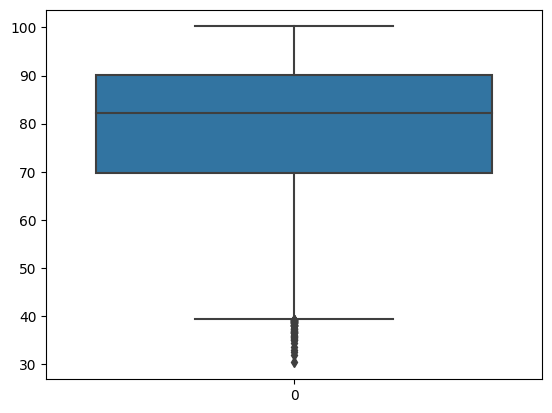

AFDP


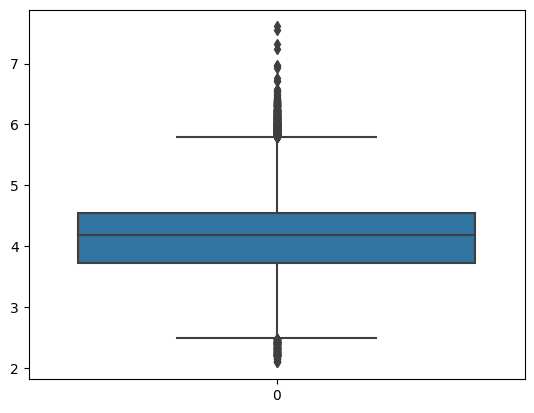

GTEP


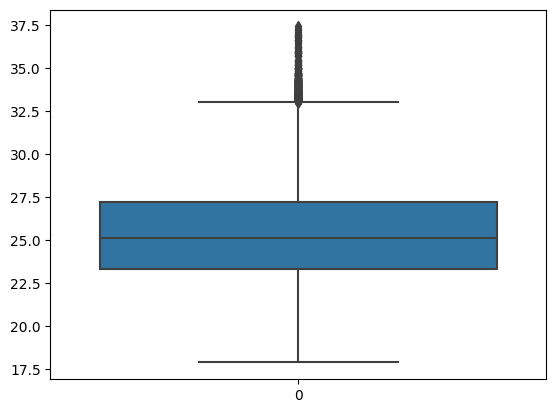

TIT


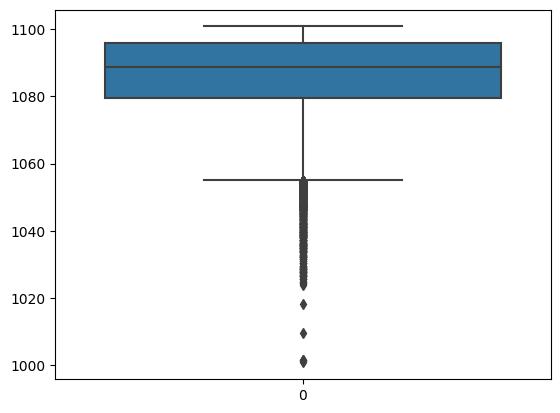

TAT


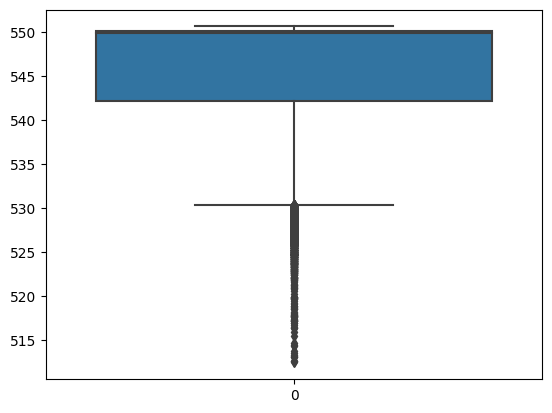

CDP


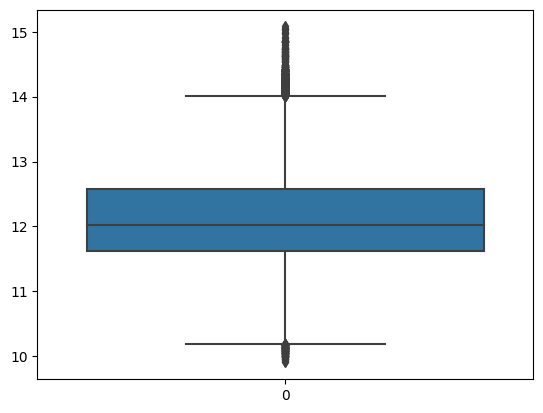

CO


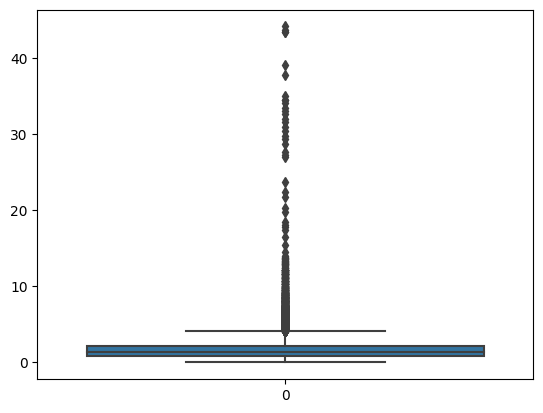

NOX


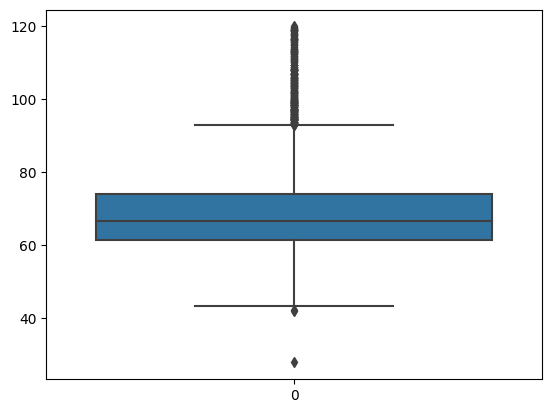

yield


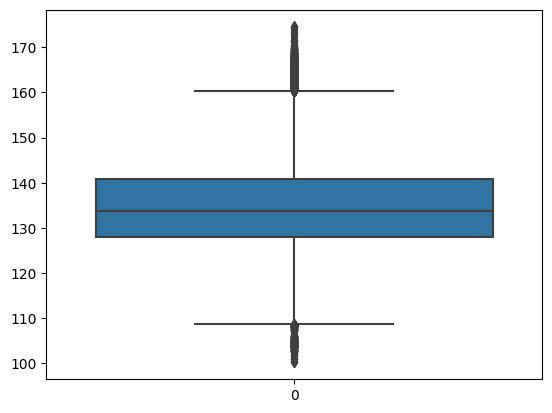

In [ ]:
# finding outliers
for feature in gas_data.columns:
  if gas_data[feature].dtype == "float64":
    print(feature)
    sns.boxplot(gas_data[feature])
    plt.show()

outliers observerd in most of the features

In [ ]:
gas_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030
NOX,15039.0,68.190934,10.470586,27.765000,61.303500,66.6010,73.9355,119.8900


observerd features are in different scales.

In [ ]:
#converting data frame into array
dataset = gas_data.values

In [ ]:
dataset

array([[   6.8594, 1007.9   ,   96.799 , ...,    3.1547,   82.722 ,
         114.7   ],
       [   6.785 , 1008.4   ,   97.118 , ...,    3.2363,   82.776 ,
         114.72  ],
       [   6.8977, 1008.8   ,   95.939 , ...,    3.2012,   82.468 ,
         114.71  ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,    7.9632,   90.912 ,
         110.19  ],
       [   7.006 , 1006.8   ,   99.008 , ...,    6.2494,   93.227 ,
         110.74  ],
       [   6.9279, 1007.2   ,   97.533 , ...,    4.9816,   92.498 ,
         111.58  ]])

In [ ]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [ ]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the ANN model
model = Sequential()
model.add(Dense(12, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='linear'))


In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)

Epoch 1/100
264/264 [==============================] - 1s 2ms/step - loss: 16018.1797 - val_loss: 11543.8428
Epoch 2/100
264/264 [==============================] - 0s 1ms/step - loss: 5739.5112 - val_loss: 2350.8181
Epoch 3/100
264/264 [==============================] - 0s 1ms/step - loss: 1285.1447 - val_loss: 634.2021
Epoch 4/100
264/264 [==============================] - 0s 1ms/step - loss: 431.3973 - val_loss: 326.9282
Epoch 5/100
264/264 [==============================] - 0s 1ms/step - loss: 281.8357 - val_loss: 247.9110
Epoch 6/100
264/264 [==============================] - 0s 1ms/step - loss: 220.9239 - val_loss: 200.4399
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: 179.9869 - val_loss: 167.5885
Epoch 8/100
264/264 [==============================] - 0s 1ms/step - loss: 149.7996 - val_loss: 142.6839
Epoch 9/100
264/264 [==============================] - 0s 1ms/step - loss: 125.2179 - val_loss: 120.1262
Epoch 10/100
264/264 [==========================

In [ ]:
y_pred=model.predict(X_test)

141/141 [==============================] - 0s 870us/step


In [ ]:
# Evaluate the model
mse = model.evaluate(X_train, y_train)
print(f"Mean Squared Error: {mse}")

329/329 [==============================] - 0s 884us/step - loss: 0.4138
Mean Squared Error: 0.4138326346874237


In [ ]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse}")

141/141 [==============================] - 0s 947us/step - loss: 0.4216
Mean Squared Error: 0.42160430550575256


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("R2 =",R2 )

R2 = 0.9983291903322854


In [ ]:
# Calculate the Adjusted R-squared
def adjusted_r2_score(y_test, y_pred, n_features):
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - n_features - 1))
    return adjusted_r2
n_features = X_test.shape[1]
adj_r2 = adjusted_r2_score(y_test, y_pred, n_features)
print("Adjusted R-squared:", adj_r2)

Adjusted R-squared: 0.9983254782468206


In [ ]:
# list all data in history
history.history.keys()

dict_keys(['loss', 'val_loss'])

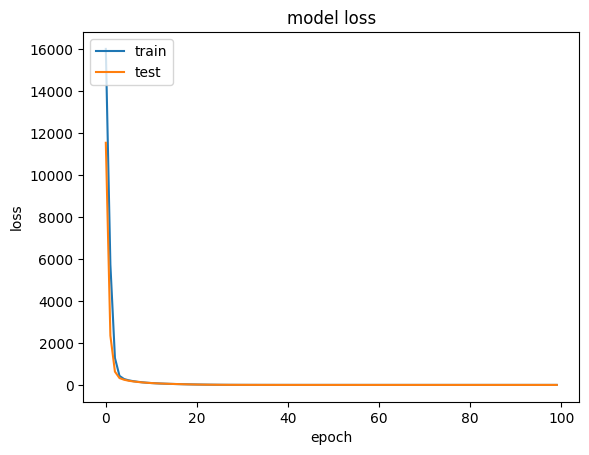

In [ ]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout
from keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_squared_error

In [ ]:
# Define the function to build the ANN model
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
# Create the KerasRegressor wrapper
model = KerasRegressor(build_fn=build_model)

<ipython-input-23-bc1ec65cb362>:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model)


In [ ]:

# Define the hyperparameters(epoch and batch_size) to tune
param_grid = {
    'epochs': [50, 100, 150],
    'batch_size': [16, 32, 64],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Streaming output truncated to the last 5000 lines.
439/439 [==============================] - 1s 2ms/step - loss: 1.1926
Epoch 15/100
439/439 [==============================] - 1s 2ms/step - loss: 0.9595
Epoch 16/100
439/439 [==============================] - 1s 2ms/step - loss: 0.8025
Epoch 17/100
439/439 [==============================] - 1s 2ms/step - loss: 0.7564
Epoch 18/100
439/439 [==============================] - 1s 3ms/step - loss: 0.7408
Epoch 19/100
439/439 [==============================] - 1s 3ms/step - loss: 0.6210
Epoch 20/100
439/439 [==============================] - 1s 2ms/step - loss: 0.6620
Epoch 21/100
439/439 [==============================] - 1s 2ms/step - loss: 0.5633
Epoch 22/100
439/439 [==============================] - 1s 2ms/step - loss: 0.6801
Epoch 23/100
439/439 [==============================] - 1s 2ms/step - loss: 0.5940
Epoch 24/100
439/439 [==============================] - 1s 2ms/step - loss: 0.6880
Epoch 25/100
439/439 [===========================

best parameters: batch size 16, epoch: 150

In [ ]:
#building model by using best parameters
# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)

In [ ]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse}")

141/141 [==============================] - 0s 1ms/step - loss: 0.3430
Mean Squared Error: 0.34302330017089844


In [ ]:
mse = model.evaluate(X_train, y_train)
print(f"Mean Squared Error: {mse}")

329/329 [==============================] - 0s 821us/step - loss: 0.3188
Mean Squared Error: 0.3188175857067108


#Tuning Hyperparameter: Learning rate

In [ ]:
# Define the function to build the ANN model
def build_model(learning_rate=0.001):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model

In [ ]:
# Create the KerasRegressor wrapper
model = KerasRegressor(build_fn=build_model,batch_size =16,epochs=150,verbose=0)

<ipython-input-39-2218358ff738>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model,batch_size =16,epochs=150,verbose=0)


In [ ]:
# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Get the best learning rate and best_params
best_learning_rate = grid_search.best_params_['learning_rate']
best_params = grid_search.best_params_

In [ ]:
best_learning_rate

0.001

best parameters: batch size 16, epoch: 150, learning_rate : 0.001

In [ ]:
# Define the function to build the ANN model
def build_model(learning_rate=0.001):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model

In [ ]:
# Use the best_params to rebuild the model and hypertune learning rate
best_model = build_model(learning_rate=0.001)
# Train the model using the entire training dataset
history = best_model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)

In [ ]:
y_pred=best_model.predict(X_test)

141/141 [==============================] - 0s 826us/step


In [ ]:
# Evaluate the model
mse = best_model.evaluate(X_train, y_train)
print(f"Mean Squared Error: {mse}")

329/329 [==============================] - 0s 867us/step - loss: 0.3436
Mean Squared Error: 0.34362539649009705


In [ ]:
# Evaluate the model
mse = best_model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse}")

141/141 [==============================] - 0s 962us/step - loss: 0.3553
Mean Squared Error: 0.35527902841567993


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("R2 =",R2 )

R2 = 0.9985920370566856


In [ ]:
# Calculate the Adjusted R-squared
def adjusted_r2_score(y_test, y_pred, n_features):
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - n_features - 1))
    return adjusted_r2
n_features = X_test.shape[1]
adj_r2 = adjusted_r2_score(y_test, y_pred, n_features)
print("Adjusted R-squared:", adj_r2)

Adjusted R-squared: 0.9985889089452809
